# 0.1 HOUSE ROCKET PROJECT

## 0.1.1. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import warnings
import pywedge as pw
import requests
import plotly.express as px
import ipywidgets as wd
import mlflow

from pandas_profiling      import ProfileReport
from ipywidgets            import fixed
from geopy.geocoders       import Nominatim
from matplotlib            import pyplot as plt, gridspec
from IPython.display       import Image
from IPython.core.display  import HTML
from tabulate              import tabulate

## 0.1.2. HELPER FUNCTIONS

In [9]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 20
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
    

In [10]:
jupyter_settings()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

Populating the interactive namespace from numpy and matplotlib


## 0.1.3. LOAD DATA

In [3]:
df5 = pd.read_csv('Dados/df5.csv', low_memory=False)

# 0.2. EXPLORE DATA 

## 0.2.1. Check Data

In [12]:
df1 = df_raw.copy()

In [13]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [14]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
                  ...   
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Length: 21, dtype: object

In [15]:
df1['date'] = pd.to_datetime( df1['date'])

In [16]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
                      ...      
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
Length: 21, dtype: object

In [11]:
profile = ProfileReport(df1, title='Relatório', html={'style':{'full_width':True}} )

In [ ]:
profile.to_notebook_iframe()

In [13]:
profile.to_file('full_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
mc = pw.Pywedge_Charts(df5, c=None, y='price')

In [ ]:
charts = mc.make_charts()

# 1.0. MÓDULO - Perguntas de negócio

## 1.1. Perguntas de negócio

MÓDULO 01 - Pergunstas de negócio:

1. Quantas casas estão disponíveis para compra?
2. Quantos atributos as casa possuem? ( numero de quartos, numero de garagens, m2, vista pro mar )
3. Quais são os atributos?
4. Qual a casa mais cara do portfólio ( casa com maior valor )?
5. Qual a casa com o maior número de quartos?
6. Qual a soma total de quartos do conjunto de dados?
7. Quantas casas possuem 2 banheiros?
8. Qual o preço médio de todas as casas no conjunto de dados?
9. Qual o preço médio de casas com 2 banheiros?
10. Qual o preço mínimo entre as casas com 3 quartos?
11. Quantas casas possuem mais de 300 metros quadrados na sala
de estar?
12. Quantas casas tem mais de 2 andares?
13. Quantas casas tem vista para o mar?
14. Das casas com vista para o mar, quantas tem 3 quartos?
15. Das casas com mais de 300 metros quadrados de sala de estar,
quantas tem mais de 2 banheiros?

## 1.2. Respondendo as perguntas - MÓDULO 01

### 1. Quantas casas estão disponíveis para compra?

In [32]:
df1.shape

(21613, 21)

R. Estão disponíveis 21623 casas.

### 2. Quantos atributos as casa possuem? ( numero de quartos, numero de garagens, m2, vista pro mar )

In [33]:
df1.shape

(21613, 21)

R. As casas possuem 21 atributos.

### 3. Quais são os atributos?

In [34]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

R. Os atributos são: id, date, price, bedrooms, bathrooms, sqft_living,
       sqft_lot, floors, waterfront, view, condition, grade,
       sqft_above, sqft_basement, yr_built, yr_renovated, zipcode,
       lat, long, sqft_living15, sqft_lot15.

### 4. Qual a casa mais cara do portfólio ( casa com maior valor )?

In [35]:
df1[['id','price']].sort_values('price',ascending=False)

,id,price
7252,6762700020,7700000.00
3914,9808700762,7062500.00
9254,9208900037,6885000.00
4411,2470100110,5570000.00
1448,8907500070,5350000.00
...,...,...
8274,3883800011,82000.00
16198,3028200080,81000.00
465,8658300340,80000.00
15293,40000362,78000.00


R. A casa mais cara custa 7700000.00 e possui o ID 6762700020.

### 5. Qual a casa com o maior número de quartos?

In [36]:
df1['bedrooms'].max()

33

In [37]:
df1[['id','bedrooms']].sort_values('bedrooms',ascending=False)

,id,bedrooms
15870,2402100895,33
8757,1773100755,11
15161,5566100170,10
13314,627300145,10
19254,8812401450,10
...,...,...
19452,3980300371,0
8484,2310060040,0
875,6306400140,0
8477,2569500210,0


R. A casa com maior número de quartos possui 33 quartos e possui o ID 2402100895.

### 6. Qual a soma total de quartos do conjunto de dados?

In [38]:
df1['bedrooms'].sum()

72854

R. O conjunto de dados possui um total de 72854 quartos.

### 7. Quantas casas possuem 2 banheiros?

In [39]:
df1.loc[(df1['bathrooms'] == 2)].count()

id               1930
date             1930
price            1930
bedrooms         1930
bathrooms        1930
                 ... 
zipcode          1930
lat              1930
long             1930
sqft_living15    1930
sqft_lot15       1930
Length: 21, dtype: int64

R. Um total de 1930 casas possuem 2 banheiros.

### 8. Qual o preço médio de todas as casas no conjunto de dados? 

In [40]:
df1['price'].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [41]:
df1['price'].mean()

540088.1417665294

R. O valor médio de todas as casas é 540088.14.

### 9. Qual o preço médio de casas com 2 banheiros?

In [42]:
aux1 = df1.loc[(df1['bathrooms'] == 2)]

In [43]:
aux1['price'].mean()

457889.7186528497

R. O preço médio das casas com 2 banheiros é 457889.12.

### 10. Qual o preço mínimo entre as casas com 3 quartos?

In [44]:
df1.loc[(df1['bathrooms'] == 3)].min()

id                           1000102
date             2014-05-02 00:00:00
price                       154000.0
bedrooms                           2
bathrooms                        3.0
                        ...         
zipcode                        98001
lat                            47.19
long                         -122.47
sqft_living15                    890
sqft_lot15                      1081
Length: 21, dtype: object

R. O preço mínimo entre as casas com 3 banheiros é 154000.00.

### 11. Quantas casas possuem mais de 300 metros quadrados na sala de estar?

In [45]:
df1.loc[(df1['sqft_living'] > 300)].count()

id               21612
date             21612
price            21612
bedrooms         21612
bathrooms        21612
                 ...  
zipcode          21612
lat              21612
long             21612
sqft_living15    21612
sqft_lot15       21612
Length: 21, dtype: int64

R. Um total de 21612 casas possuem sala de estar com mais de 300 metros quadrados.

### 12. Quantas casas tem mais de 2 andares?

In [46]:
df1.loc[(df1['floors'] >= 3)].count()

id               621
date             621
price            621
bedrooms         621
bathrooms        621
                ... 
zipcode          621
lat              621
long             621
sqft_living15    621
sqft_lot15       621
Length: 21, dtype: int64

R. Um total de 621 casas possuem mais que 2 andares.

### 13. Quantas casas tem vista para o mar?

In [47]:
df1.loc[(df1['waterfront'] == 1)].count()

id               163
date             163
price            163
bedrooms         163
bathrooms        163
                ... 
zipcode          163
lat              163
long             163
sqft_living15    163
sqft_lot15       163
Length: 21, dtype: int64

R. Um total de 163 casas possuem vista para o mar.

### 14. Das casas com vista para o mar, quantas tem 3 quartos?

In [48]:
df1.loc[(df1['waterfront'] == 1) & (df1['bedrooms'] == 3)].count()

id               64
date             64
price            64
bedrooms         64
bathrooms        64
                 ..
zipcode          64
lat              64
long             64
sqft_living15    64
sqft_lot15       64
Length: 21, dtype: int64

R. Um total de 64 casas com vista para o mar tem 3 quartos.

### 15. Das casas com mais de 300 metros quadrados de sala de estar, quantas tem mais de 2 banheiros?

In [49]:
df1.loc[(df1['sqft_living'] > 300) & (df1['bathrooms'] > 2)].count()

id               11242
date             11242
price            11242
bedrooms         11242
bathrooms        11242
                 ...  
zipcode          11242
lat              11242
long             11242
sqft_living15    11242
sqft_lot15       11242
Length: 21, dtype: int64

R. Um total de 11242 casas possuem mais de 2 banheiros e mais de 300 metros quadrados de sala de estar.

# 2.0. MÓDULO - Perguntas de negócio  

## 2.1. Perguntas de negócio

MÓDULO 02 - Pergunstas de negócio:

1. Qual a data do imóvel mais antigo no portfólio?

2. Quantos imóveis possuem o número máximo de andares?

3. Criar uma classificação para o imóveis, separando-os em baixo e alto padrão, de acordo com preço.
    - Acima de RS 540.000 −> alto padrão    
    - Abaixo de 𝑅S 540.000 -> baixo padrão 

4. Gostaria de um relatório ordenado pelo preço e contento as seguintes informações:
    ( id do imóvel, data que o imóvel ficou disponível para compra, o número de quartos, 
    o tamanho total to terreno, o preço, a classificação do imóvel ( alto e baixo padrão ).

5. Gostaria de um Mapa indicando onde as casas estão localizadas geograficamento.

1. Crie uma nova coluna chamada: “house_age”
    - Se o valor da coluna “date” for maior que 2015-01-01 => ‘new_house’
    - Se o valor da coluna “date” for menor que 2015-01-01 => ‘old_house’

2. Crie uma nova coluna chamada: “dormitory_type”
    - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’
3. Crie uma nova coluna chamada: “condition_type”
    - Se o valor da coluna “condition” for menor ou igual à 2 => ‘bad’
    - Se o valor da coluna “condition” for igual à 3 ou 4 => ‘regular’
    - Se o valor da coluna “condition” for igual à 5 => ‘good’

4. Modifique o TIPO a Coluna “condition” para STRING

5. Delete as colunas: “sqft_living15” e “sqft_lot15”

6. Modifique o TIPO a Coluna “yr_build” para DATE

7. Modifique o TIPO a Coluna “yr_renovated” para DATE

8. Qual a data mais antiga de construção de um imóvel?

9. Qual a data mais antiga de renovação de um imóvel?

10. Quantos imóveis tem 2 andares?

11. Quantos imóveis estão com a condição igual a “regular” ?

12. Quantos imóveis estão com a condição igual a “bad”e possuem “vista para água” ?

13. Quantos imóveis estão com a condição igual a “good” e são “new_house”?

14. Qual o valor do imóvel mais caro do tipo “studio” ?

15. Quantos imóveis do tipo “house” foram reformados em 2015 ?

16. Qual o maior número de quartos que um imóveis do tipo “house” possui ?

17. Quantos imóveis “new_house” foram reformados no ano de 2014?

18. Selecione as colunas: “id”, “date”, “price”, “floors”, “zipcode” pelo método:
    -  Direto pelo nome das colunas.
    -  Pelos Índices.
    -  Pelos Índices das linhas e o nome das colunas
    -  Índices Booleanos

19. Salve um arquivo .csv com somente as colunas do item 10 ao 17.

20. Modifique a cor dos pontos no mapa de “pink” para “verde-escuro.

## 2.2. Respondendo as perguntas - MÓDULO 02

### 1. Qual a data do imóvel mais antigo no portfólio?

In [50]:
df2 = df1.copy()

In [51]:
df2[['id','yr_built']].sort_values('yr_built')

,id,yr_built
4697,9126101645,1900
2961,1947300115,1900
12369,9138100350,1900
15016,1703400585,1900
5236,844000425,1900
...,...,...
21270,1773100541,2015
17098,9126100346,2015
7526,9520900210,2015
20086,2768100512,2015


In [52]:
df2.loc[(df1['yr_built'] == 1900)].count()

id               87
date             87
price            87
bedrooms         87
bathrooms        87
                 ..
zipcode          87
lat              87
long             87
sqft_living15    87
sqft_lot15       87
Length: 21, dtype: int64

R. Os 87 imóveis mais antigos foram construídos em 1900. 

### 2. Quantos imóveis possuem o número máximo de andares?

In [53]:
df2['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [54]:
df2.loc[(df1['floors'] == 3.5) ].count()

id               8
date             8
price            8
bedrooms         8
bathrooms        8
                ..
zipcode          8
lat              8
long             8
sqft_living15    8
sqft_lot15       8
Length: 21, dtype: int64

R. Existem 8 imóveis que possuem o número máximo de andares. 

### 3. Criar uma classificação para o imóveis, separando-os em baixo e alto padrão, de acordo com preço. 
Acima de R$ 540.000 −> alto padrão

Abaixo de 𝑅$ 540.000 -> baixo padrão

In [55]:
df2['level'] = 'standard'

In [56]:
df2.loc[df1['price'] > 540000, 'level'] = 'high_level'

In [57]:
df2.loc[df1['price'] < 540000, 'level'] = 'low_level'

In [58]:
df2['level'].unique()

array(['low_level', 'high_level', 'standard'], dtype=object)

In [59]:
df2['level'].head().T

0     low_level
1     low_level
2     low_level
3    high_level
4     low_level
Name: level, dtype: object

### 4. Gostaria de um relatório ordenado pelo preço e contento as seguintes informações: ( id do imóvel, data que o imóvel ficou disponível para compra, o número de quartos, o tamanho total to terreno, o preço, a classificação do imóvel ( alto e baixo padrão ).

In [60]:
report = df2[['id', 'date' ,'price', 'bedrooms', 'sqft_lot', 'level']].sort_values('price', ascending=False)

In [61]:
report.head().T

,7252,3914,9254,4411,1448
id,6762700020,9808700762,9208900037,2470100110,8907500070
date,2014-10-13 00:00:00,2014-06-11 00:00:00,2014-09-19 00:00:00,2014-08-04 00:00:00,2015-04-13 00:00:00
price,7700000.0,7062500.0,6885000.0,5570000.0,5350000.0
bedrooms,6,5,6,5,5
sqft_lot,27600,37325,31374,35069,23985
level,high_level,high_level,high_level,high_level,high_level


In [62]:
report.to_csv('dados/report_mod02.csv', index=False)

### 5. Gostaria de um Mapa indicando onde as casas estão localizadas geograficamento.

In [63]:
mapa = df2[['id', 'lat', 'long', 'price']]

In [64]:
geo_mapa = px.scatter_mapbox(mapa, lat= 'lat', lon= 'long',
                            hover_name= 'id', hover_data= ['price'],
                            color_discrete_sequence= ['fuchsia'],
                            zoom= 3, height= 300)


In [ ]:
geo_mapa.update_layout( mapbox_style= 'open-street-map')
geo_mapa.update_layout( height= 600, margin={'r':0, 't':0, 'l':0, 'b':0} )
geo_mapa.show()

In [66]:
geo_mapa.write_html('Dados/mapa_house_rocket.html')

### 6. Crie uma nova coluna chamada: “house_age”

    Se o valor da coluna “date” for maior que 2015-01-01 => ‘new_house’
    Se o valor da coluna “date” for menor que 2015-01-01 => ‘old_house’

In [67]:
df2['house_age'] = np.nan

In [68]:
df2.loc[df2['date'] >= '2015-01-01', 'house_age'] = 'new_house'

In [69]:
df2.loc[df2['date'] < '2015-01-01', 'house_age'] = 'old_house'

In [70]:
df2['house_age'].unique()

array(['old_house', 'new_house'], dtype=object)

### 7. Crie uma nova coluna chamada: “dormitory_type”

    Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [71]:
df2['dormitory_type'] = np.nan

In [72]:
df2.loc[df2['bedrooms'] <= 1, 'dormitory_type'] = 'studio'
df2.loc[(df2['bedrooms'] > 1) & (df2['bedrooms'] == 2), 'dormitory_type'] = 'apartament'
df2.loc[df2['bedrooms'] > 2, 'dormitory_type'] = 'house'

In [73]:
df2['dormitory_type'].unique()

array(['house', 'apartament', 'studio'], dtype=object)

### 8. Crie uma nova coluna chamada: “condition_type”

    Se o valor da coluna “condition” for menor ou igual à 2 => ‘bad’
    Se o valor da coluna “condition” for igual à 3 ou 4 => ‘regular’
    Se o valor da coluna “condition” for igual à 5 => ‘good’

In [74]:
df2['condition_type'] = np.nan

In [75]:
df2.loc[df2['condition'] <= 2, 'condition_type'] = 'bad'
df2.loc[(df2['condition'] > 2) & (df2['condition'] <= 4), 'condition_type'] = 'regular'
df2.loc[df2['condition'] >= 5, 'condition_type'] = 'good'

In [76]:
df2['condition_type'].unique()

array(['regular', 'good', 'bad'], dtype=object)

### 9. Modifique o TIPO a Coluna “condition” para STRING.

In [77]:
df2.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
                       ...      
sqft_lot15                 int64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
Length: 25, dtype: object

In [78]:
df2['condition'] = df2['condition'].astype(str)

In [79]:
df2.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
                       ...      
sqft_lot15                 int64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
Length: 25, dtype: object

### 10. Delete as colunas: “sqft_living15” e “sqft_lot15”

In [80]:
df2 = df2.drop(columns=['sqft_living15', 'sqft_lot15'])

In [81]:
df2.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
...,...,...,...,...,...
long,-122.26,-122.32,-122.23,-122.39,-122.05
level,low_level,low_level,low_level,high_level,low_level
house_age,old_house,old_house,new_house,old_house,new_house
dormitory_type,house,house,apartament,house,house


### 11. Modifique o TIPO a Coluna “yr_build” para DATE

In [82]:
df2.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
                       ...      
long                     float64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
Length: 23, dtype: object

In [83]:
df2['yr_built'] = df2['yr_built'].apply(pd.to_datetime, format= '%Y')

In [84]:
df2.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
                       ...      
long                     float64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
Length: 23, dtype: object

### 12. Modifique o TIPO a Coluna “yr_renovated” para DATE.

In [85]:
df2['yr_renovated'] = df2['yr_renovated'].apply(pd.to_datetime, format= '%Y', errors= 'coerce')

In [86]:
df2.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
                       ...      
long                     float64
level                     object
house_age                 object
dormitory_type            object
condition_type            object
Length: 23, dtype: object

### 13. Qual a data mais antiga de construção de um imóvel?

In [87]:
df2[['id','yr_built']].sort_values('yr_built', ascending=True)

,id,yr_built
4697,9126101645,1900-01-01
2961,1947300115,1900-01-01
12369,9138100350,1900-01-01
15016,1703400585,1900-01-01
5236,844000425,1900-01-01
...,...,...
21270,1773100541,2015-01-01
17098,9126100346,2015-01-01
7526,9520900210,2015-01-01
20086,2768100512,2015-01-01


### 14. Qual a data mais antiga de renovação de um imóvel?

In [88]:
df2[['id','yr_renovated']].sort_values('yr_renovated', ascending=True)

,id,yr_renovated
13736,4475800065,1934-01-01
7157,2754700170,1940-01-01
6461,148000440,1940-01-01
14860,7625701830,1944-01-01
1788,7211400990,1945-01-01
...,...,...
21608,263000018,NaT
21609,6600060120,NaT
21610,1523300141,NaT
21611,291310100,NaT


### 15. Quantos imóveis tem 2 andares?

In [89]:
df2[df2['floors'] == 2].shape

(8241, 23)

### 16. Quantos imóveis estão com a condição igual a “regular” ?

In [90]:
df2[df2['condition_type'] == 'regular'].shape

(19710, 23)

### 17. Quantos imóveis estão com a condição igual a “bad”e possuem “vista para água” ?

In [91]:
df2[(df2['condition_type'] == 'bad') & (df2['waterfront'] == 1)].shape

(2, 23)

### 18. Quantos imóveis estão com a condição igual a “good” e são “new_house”?

In [92]:
df2[(df2['condition_type'] == 'good') & (df2['house_age'] == 'new_house')].shape

(423, 23)

### 19. Qual o valor do imóvel mais caro do tipo “studio” ?

In [93]:
df2[df2['dormitory_type'] == 'studio'].sort_values('price', ascending= False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,house_age,dormitory_type,condition_type
6994,2954400190,2014-06-24,1295650.00,0,0.00,4810,28008,2.00,0,0,3,12,4810,0,1990-01-01,NaT,98053,47.66,-122.07,high_level,old_house,studio,regular
8445,724069023,2015-04-14,1247000.00,1,1.25,1810,5070,1.50,1,4,4,8,1230,580,1967-01-01,NaT,98075,47.58,-122.08,high_level,new_house,studio,regular
875,6306400140,2014-06-12,1095000.00,0,0.00,3064,4764,3.50,0,2,3,7,3064,0,1990-01-01,NaT,98102,47.64,-122.32,high_level,old_house,studio,regular
9888,1231000310,2014-08-12,713000.00,1,1.00,1180,4000,1.50,0,2,4,8,840,340,1910-01-01,NaT,98118,47.56,-122.27,high_level,old_house,studio,regular
4410,4083304190,2014-08-04,680000.00,1,2.50,1820,3008,2.00,0,0,3,7,1090,730,1910-01-01,2004-01-01,98103,47.65,-122.34,high_level,old_house,studio,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16530,2114700500,2015-04-18,90000.00,1,1.00,560,4120,1.00,0,0,3,4,560,0,1947-01-01,NaT,98106,47.53,-122.35,low_level,new_house,studio,regular
7992,2734100835,2015-03-03,90000.00,1,1.00,780,4000,1.00,0,0,3,5,780,0,1905-01-01,NaT,98108,47.54,-122.32,low_level,new_house,studio,regular
3108,1721801591,2015-02-19,89950.00,1,1.00,570,4080,1.00,0,0,3,5,570,0,1942-01-01,NaT,98146,47.51,-122.33,low_level,new_house,studio,regular
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,0,0,2,4,430,0,1912-01-01,NaT,98014,47.65,-121.91,low_level,old_house,studio,bad


### 20. Quantos imóveis do tipo “house” foram reformados em 2015 ?

In [94]:
df2[(df2['dormitory_type'] == 'house') & (df2['yr_renovated'] == '2015-01-01')].shape

(16, 23)

### 21. Qual o maior número de quartos que um imóveis do tipo “house” possui ?

In [95]:
df2.loc[df2['dormitory_type'] == 'house'].sort_values('bedrooms', ascending= False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,level,house_age,dormitory_type,condition_type
15870,2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0,0,5,7,1040,580,1947-01-01,NaT,98103,47.69,-122.33,high_level,old_house,house,good
8757,1773100755,2014-08-21,520000.00,11,3.00,3000,4960,2.00,0,0,3,7,2400,600,1918-01-01,1999-01-01,98106,47.56,-122.36,low_level,old_house,house,regular
13314,627300145,2014-08-14,1148000.00,10,5.25,4590,10920,1.00,0,2,3,9,2500,2090,2008-01-01,NaT,98004,47.59,-122.11,high_level,old_house,house,regular
19254,8812401450,2014-12-29,660000.00,10,3.00,2920,3745,2.00,0,0,4,7,1860,1060,1913-01-01,NaT,98105,47.66,-122.32,high_level,old_house,house,regular
15161,5566100170,2014-10-29,650000.00,10,2.00,3610,11914,2.00,0,0,4,7,3010,600,1958-01-01,NaT,98006,47.57,-122.17,high_level,old_house,house,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,9287800375,2014-10-30,685000.00,3,2.00,2210,5000,1.50,0,2,3,7,1710,500,1909-01-01,NaT,98103,47.68,-122.36,high_level,old_house,house,regular
9400,2407000145,2015-01-20,197200.00,3,1.00,1140,8775,1.00,0,0,3,6,990,150,1942-01-01,NaT,98146,47.48,-122.34,low_level,new_house,house,regular
9401,452001280,2014-07-03,529950.00,3,1.00,1240,5000,1.50,0,0,5,7,1240,0,1909-01-01,NaT,98107,47.68,-122.37,low_level,old_house,house,good
9403,4232901120,2014-05-20,792000.00,3,1.50,1570,1050,2.00,0,0,3,8,1570,0,1915-01-01,NaT,98109,47.64,-122.36,high_level,old_house,house,regular


### 22. Quantos imóveis “new_house” foram reformados no ano de 2014?

In [96]:
df2[(df2['dormitory_type'] == 'house') & (df2['yr_renovated'] == '2014-01-01')].shape

(87, 23)

### 23. Selecione as colunas: “id”, “date”, “price”, “floors”, “zipcode” pelo método:

    -  Direto pelo nome das colunas.
    -  Pelos Índices.
    -  Pelos Índices das linhas e o nome das colunas
    -  Índices Booleanos

In [97]:
df2[['id', 'date', 'price', 'floors', 'zipcode']]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.00,1.00,98178
1,6414100192,2014-12-09,538000.00,2.00,98125
2,5631500400,2015-02-25,180000.00,1.00,98028
3,2487200875,2014-12-09,604000.00,1.00,98136
4,1954400510,2015-02-18,510000.00,1.00,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3.00,98103
21609,6600060120,2015-02-23,400000.00,2.00,98146
21610,1523300141,2014-06-23,402101.00,2.00,98144
21611,291310100,2015-01-16,400000.00,2.00,98027


In [98]:
df2.iloc[:,[0,1,2,7,16]]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.00,1.00,98178
1,6414100192,2014-12-09,538000.00,2.00,98125
2,5631500400,2015-02-25,180000.00,1.00,98028
3,2487200875,2014-12-09,604000.00,1.00,98136
4,1954400510,2015-02-18,510000.00,1.00,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3.00,98103
21609,6600060120,2015-02-23,400000.00,2.00,98146
21610,1523300141,2014-06-23,402101.00,2.00,98144
21611,291310100,2015-01-16,400000.00,2.00,98027


In [99]:
df2.loc[:,['id','date', 'price', 'floors', 'zipcode']]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.00,1.00,98178
1,6414100192,2014-12-09,538000.00,2.00,98125
2,5631500400,2015-02-25,180000.00,1.00,98028
3,2487200875,2014-12-09,604000.00,1.00,98136
4,1954400510,2015-02-18,510000.00,1.00,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3.00,98103
21609,6600060120,2015-02-23,400000.00,2.00,98146
21610,1523300141,2014-06-23,402101.00,2.00,98144
21611,291310100,2015-01-16,400000.00,2.00,98027


In [100]:
col = [True, True, True, False, False, False, False, True, False, False, False, False,
       False, False, False, False, True, False, False, False, False, False, False]
df2.loc[:, col]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.00,1.00,98178
1,6414100192,2014-12-09,538000.00,2.00,98125
2,5631500400,2015-02-25,180000.00,1.00,98028
3,2487200875,2014-12-09,604000.00,1.00,98136
4,1954400510,2015-02-18,510000.00,1.00,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3.00,98103
21609,6600060120,2015-02-23,400000.00,2.00,98146
21610,1523300141,2014-06-23,402101.00,2.00,98144
21611,291310100,2015-01-16,400000.00,2.00,98027


### 24. Salve um arquivo .csv com somente as colunas do item 10 ao 17.

In [101]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'level', 'house_age', 'dormitory_type',
       'condition_type'],
      dtype='object')

In [102]:
questao24 = df2[['condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat']]

In [103]:
questao24.head()

,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
0,3,7,1180,0,1955-01-01,NaT,98178,47.51
1,3,7,2170,400,1951-01-01,1991-01-01,98125,47.72
2,3,6,770,0,1933-01-01,NaT,98028,47.74
3,5,7,1050,910,1965-01-01,NaT,98136,47.52
4,3,8,1680,0,1987-01-01,NaT,98074,47.62


In [104]:
questao24.to_csv('Dados/q24.csv', index= False)

### 25. Modifique a cor dos pontos no mapa de “pink” para “verde-escuro.

In [105]:
geo_mapa = px.scatter_mapbox(mapa, lat= 'lat', lon= 'long',
                            hover_name= 'id', hover_data= ['price'],
                            color_discrete_sequence= ['darkgreen'],
                            zoom= 3, height= 300)

In [ ]:
geo_mapa.update_layout( mapbox_style= 'open-street-map')
geo_mapa.update_layout( height= 600, margin={'r':0, 't':0, 'l':0, 'b':0} )
geo_mapa.show()

# 3.0. MÓDULO - Perguntas de negócio

## 3.1. Perguntas de negócio

1. Qual o número de imóveis por ano de construção?
2. Qual o menor número de quartos por ano de construção dos imóveis?
3. Qual o preço de compra mais alto por cada número de quartos?
4. Qual a soma de todos os preços de compra por cada número de quartos?
5. Qual a soma de todos os preços de compra pelo número de quartos e banheiros?
6. Qual o tamanho médio Das salas dos imóveis por ano de construção?
7. Qual o tamanho mediano das salas dos imóveis por ano de construção?
8. Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?
9. Como é o crescimento médio preços de compra dos imóveis, por dia e semana do ano?
10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

1. Crie uma nova coluna chamada: “dormitory_type”
    - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’
    - Se o valor da coluna “bedrooms” for maior que 2 = 0 => ‘kitnet’
    
2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.
3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.
4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.
5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.
6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.
7. Crie um Dashboard com os gráficos das questões 12, 13, 14 ( Dashboard: 1 Linha e 2 colunas )
8. Crie um Dashboard com os gráficos das perguntas 12, 14 ( Dashboard: 2 colunas )
9. Crie um Dashboard com os gráficos das perguntas 13, 15 ( Dashboard: 2 Linhas )
10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

## 3.2. Respondendo as perguntas - MÓDULO 03

### 1. Qual o número de imóveis por ano de construção?

In [107]:
df3 = df2.copy()

In [108]:
df3.to_csv('Dados/df3.csv', index= False)

In [109]:
df3[['id','yr_built']].groupby('yr_built').count()

,id
yr_built,
1900-01-01,87
1901-01-01,29
1902-01-01,27
1903-01-01,46
1904-01-01,45
...,...
2011-01-01,130
2012-01-01,170
2013-01-01,201


### 2. Qual o menor número de quartos por ano de construção dos imóveis?

In [110]:
df3[['bedrooms', 'yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900-01-01,1
1901-01-01,2
1902-01-01,2
1903-01-01,1
1904-01-01,2
...,...
2011-01-01,1
2012-01-01,2
2013-01-01,2


### 3. Qual o preço de compra mais alto por cada número de quartos?

In [111]:
df3[['price', 'bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.00
1,1247000.00
2,3278000.00
3,3800000.00
4,4489000.00
5,7062500.00
6,7700000.00
7,3200000.00
8,3300000.00


### 4. Qual a soma de todos os preços de compra por cada número de quartos?

In [112]:
df3[['price', 'bedrooms']].groupby( 'bedrooms').sum()

,price
bedrooms,
0,5323550.00
1,63210934.00
2,1107788602.00
3,4580263939.00
4,4372957028.00
5,1259346326.00
6,224541613.00
7,36145017.00
8,14366000.00


### 5. Qual a soma de todos os preços de compra pelo número de quartos e banheiros?

In [113]:
df3[['price', 'bedrooms', 'bathrooms' ]].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

### 6. Qual o tamanho médio Das salas dos imóveis por ano de construção?

In [114]:
df3[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900-01-01,1732.01
1901-01-01,1763.62
1902-01-01,1919.63
1903-01-01,1507.74
1904-01-01,1603.18
...,...
2011-01-01,2313.68
2012-01-01,2378.74
2013-01-01,2636.59


### 7. Qual o tamanho mediano das salas dos imóveis por ano de construção?

In [115]:
df3[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900-01-01,1540.00
1901-01-01,1610.00
1902-01-01,1600.00
1903-01-01,1505.00
1904-01-01,1280.00
...,...
2011-01-01,2270.00
2012-01-01,2237.50
2013-01-01,2580.00


### 8. Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção? 

In [116]:
df3[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900-01-01,732.94
1901-01-01,668.23
1902-01-01,878.66
1903-01-01,469.72
1904-01-01,1076.87
...,...
2011-01-01,804.86
2012-01-01,771.43
2013-01-01,883.50


### 9. Como é o crescimento médio preços de compra dos imóveis, por dia e semana do ano?

In [117]:
df3['year'] = pd.to_datetime( df3['date']).dt.year

<BarContainer object of 2 artists>

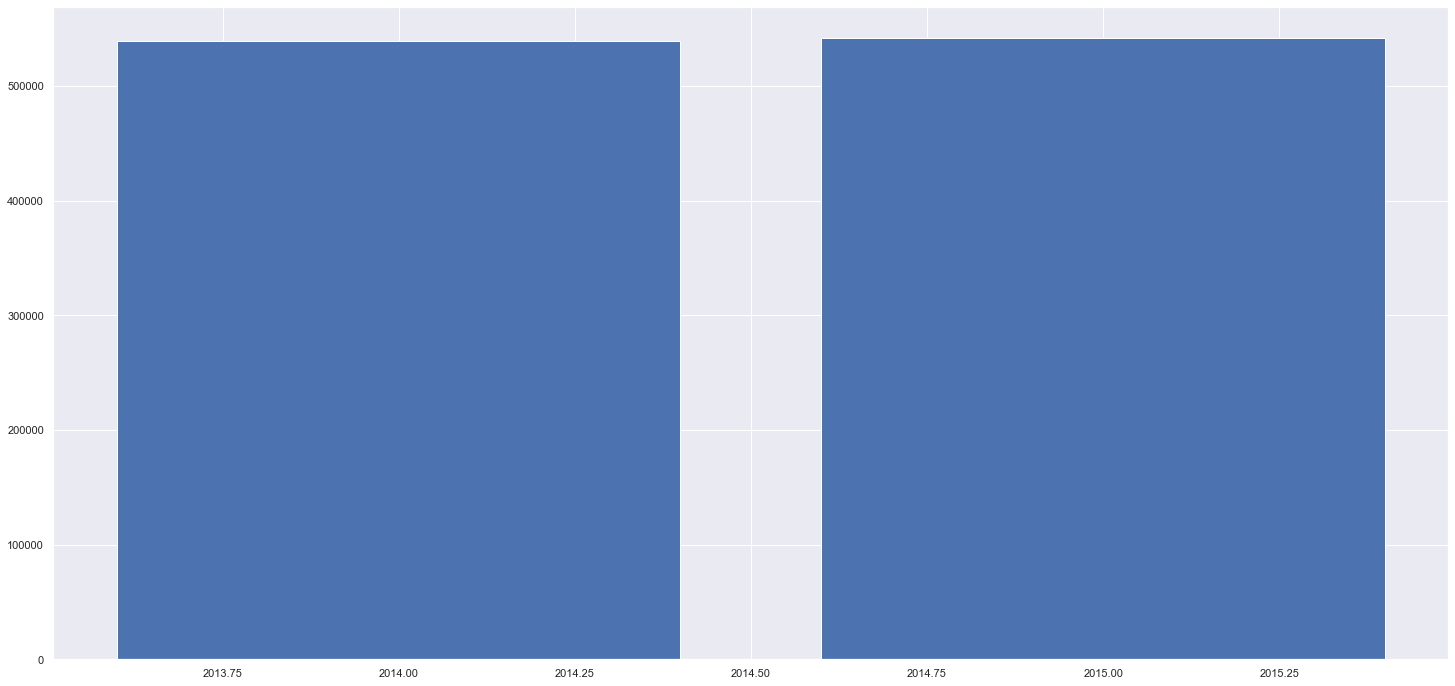

In [118]:
by_year = df3[['price', 'year']].groupby('year').mean().reset_index()
plt.bar( by_year['year'], by_year['price'])

In [119]:
df3['day'] = pd.to_datetime( df3['date'])

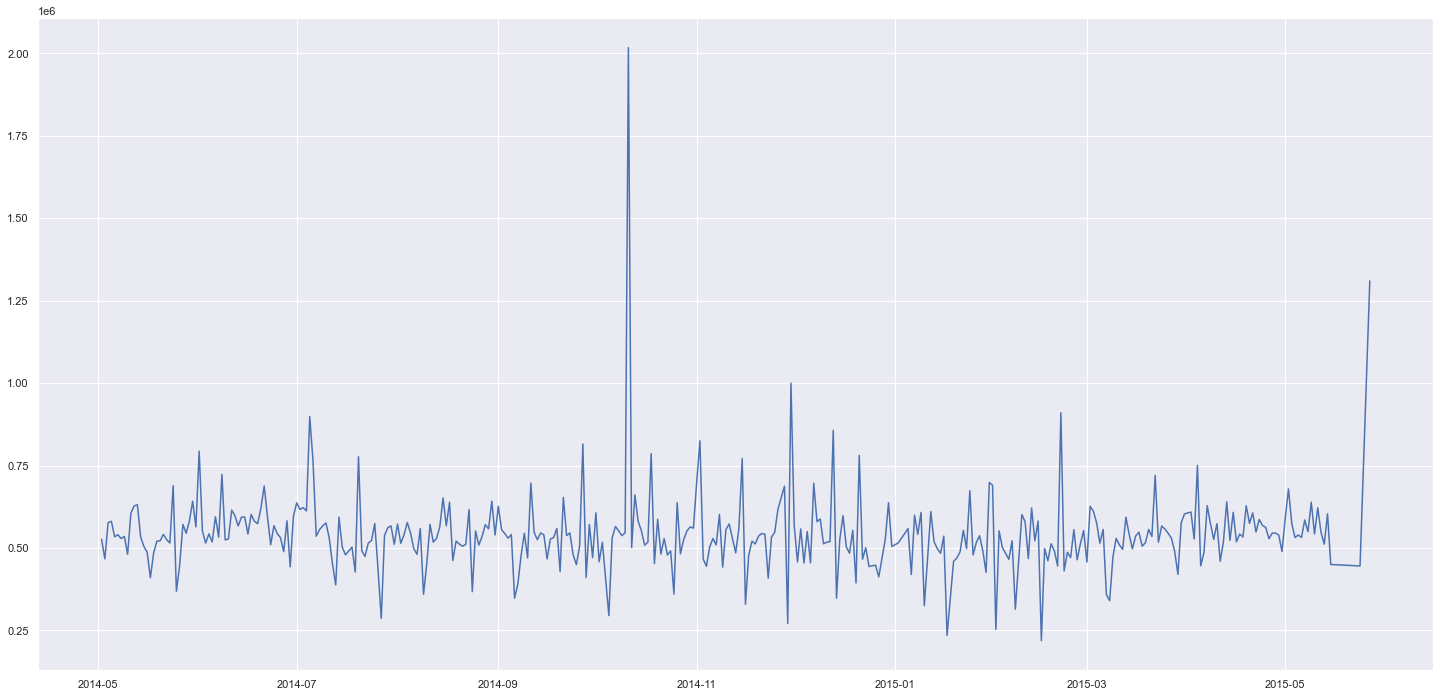

In [120]:

by_day = df3[['price', 'day']].groupby('day').mean().reset_index()
plt.plot( by_day['day'], by_day['price'])

In [121]:
df3['year_week'] = pd.to_datetime( df3['date']).dt.strftime( '%Y-%U')

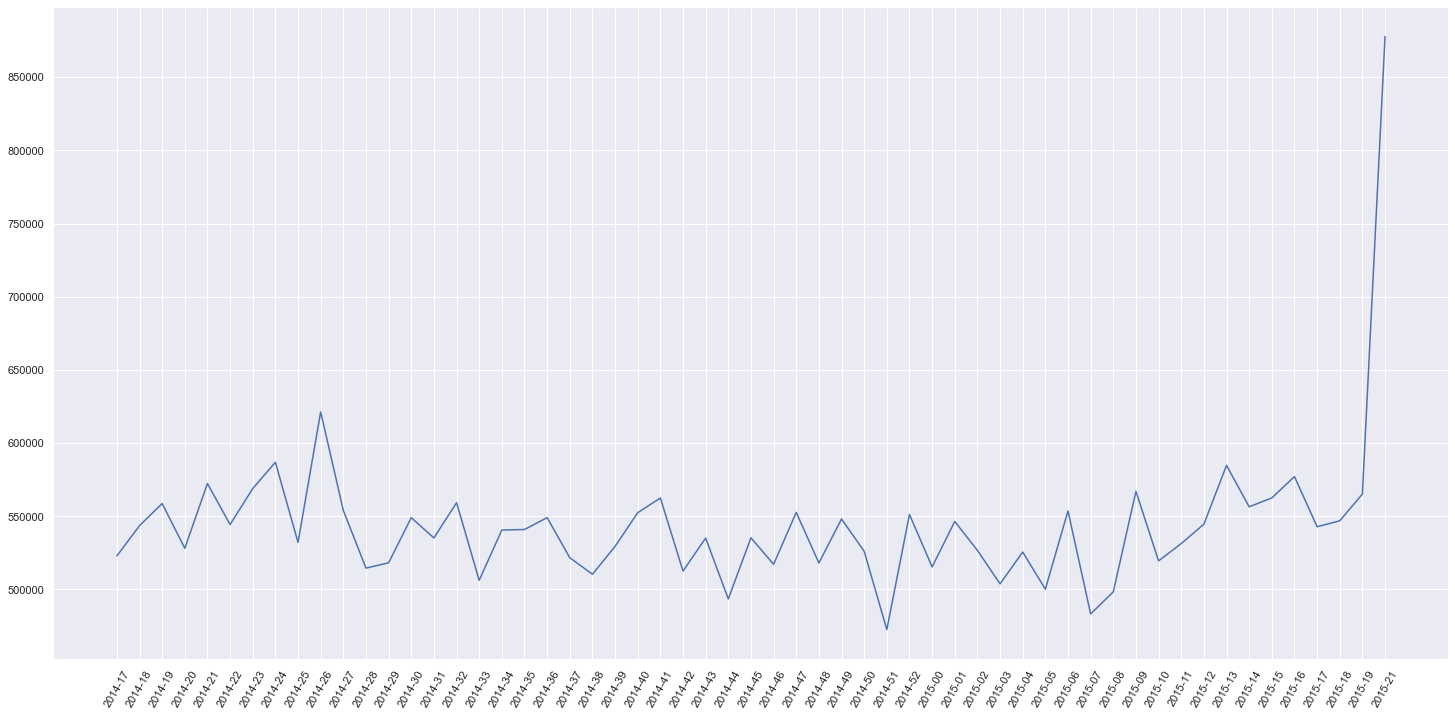

In [122]:
by_year_week = df3[['price', 'year_week']].groupby( 'year_week').mean().reset_index()
plt.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks( rotation= 60);

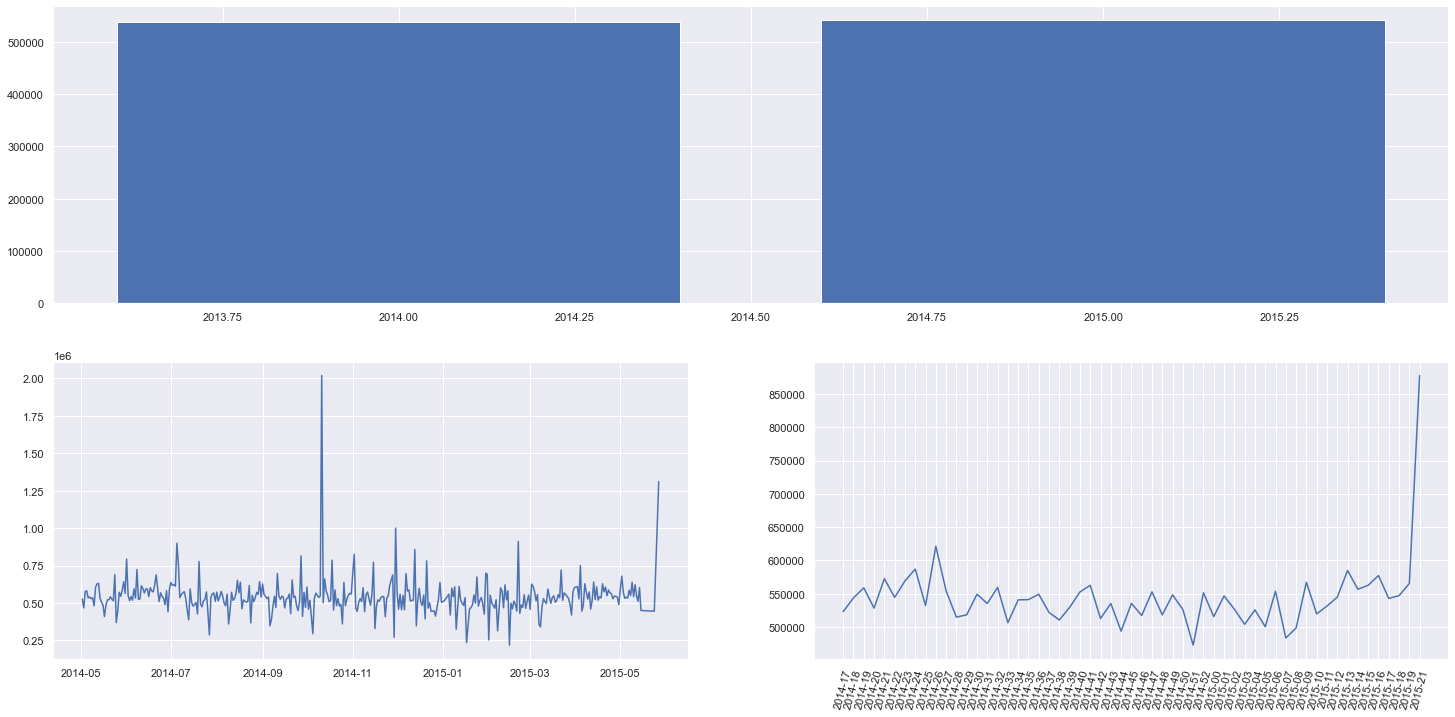

In [123]:
grid = gridspec.GridSpec( 2, 2 )

plt.subplot( grid[0, :])
plt.bar( by_year['year'], by_year['price'])

plt.subplot( grid[1, 0])
plt.plot( by_day['day'], by_day['price'])

plt.subplot( grid[1,1])
plt.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks( rotation= 75);

### 10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

In [124]:
price_map = px.scatter_mapbox(mapa, lat= 'lat', lon= 'long',
                            size= 'price', 
                            color_continuous_scale= px.colors.cyclical.IceFire,
                            size_max= 15, zoom= 10)

In [125]:
price_map.update_layout( mapbox_style= 'open-street-map')
price_map.update_layout( height= 600, margin={'r':0, 't':0, 'l':0, 'b':0} )
price_map.show()

### 11. Crie uma nova coluna chamada: “dormitory_type”

    Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    Se o valor da coluna “bedrooms” for maior que 2 => ‘house’
    Se o valor da coluna “bedrooms” for igual à 0 => ‘kitnet’

In [126]:
df3.loc[df3['bedrooms'] == 0 , 'dormitory_type'] = 'kitnet'
df3.loc[df3['bedrooms'] == 1 , 'dormitory_type'] = 'studio'
df3.loc[df3['bedrooms'] == 2 , 'dormitory_type'] = 'apartment'
df3.loc[df3['bedrooms'] > 2 , 'dormitory_type'] = 'house'

### 12. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

<BarContainer object of 13 artists>

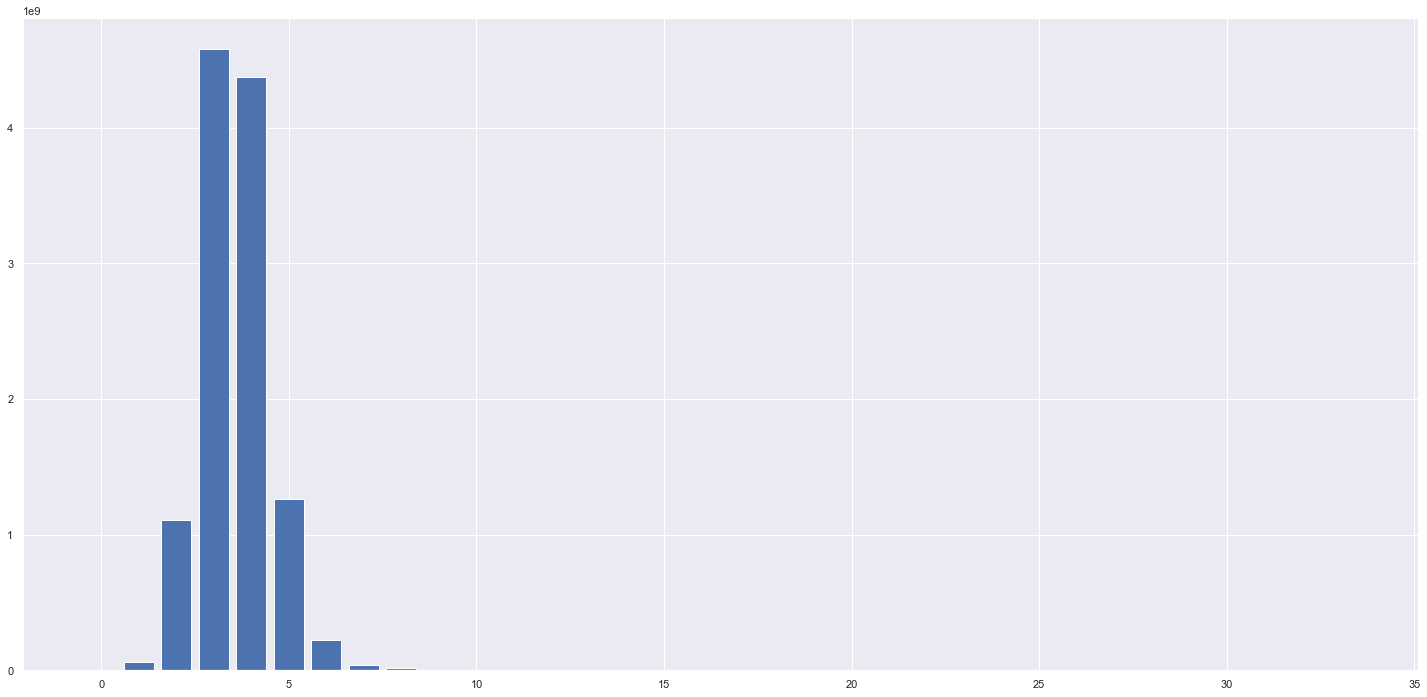

In [127]:
by_bedrooms = df3[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
plt.bar( by_bedrooms['bedrooms'], by_bedrooms['price'])

### 13. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

(array([-32872., -25567., -18263., -10958.,  -3653.,   3652.,  10957.,
         18262.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

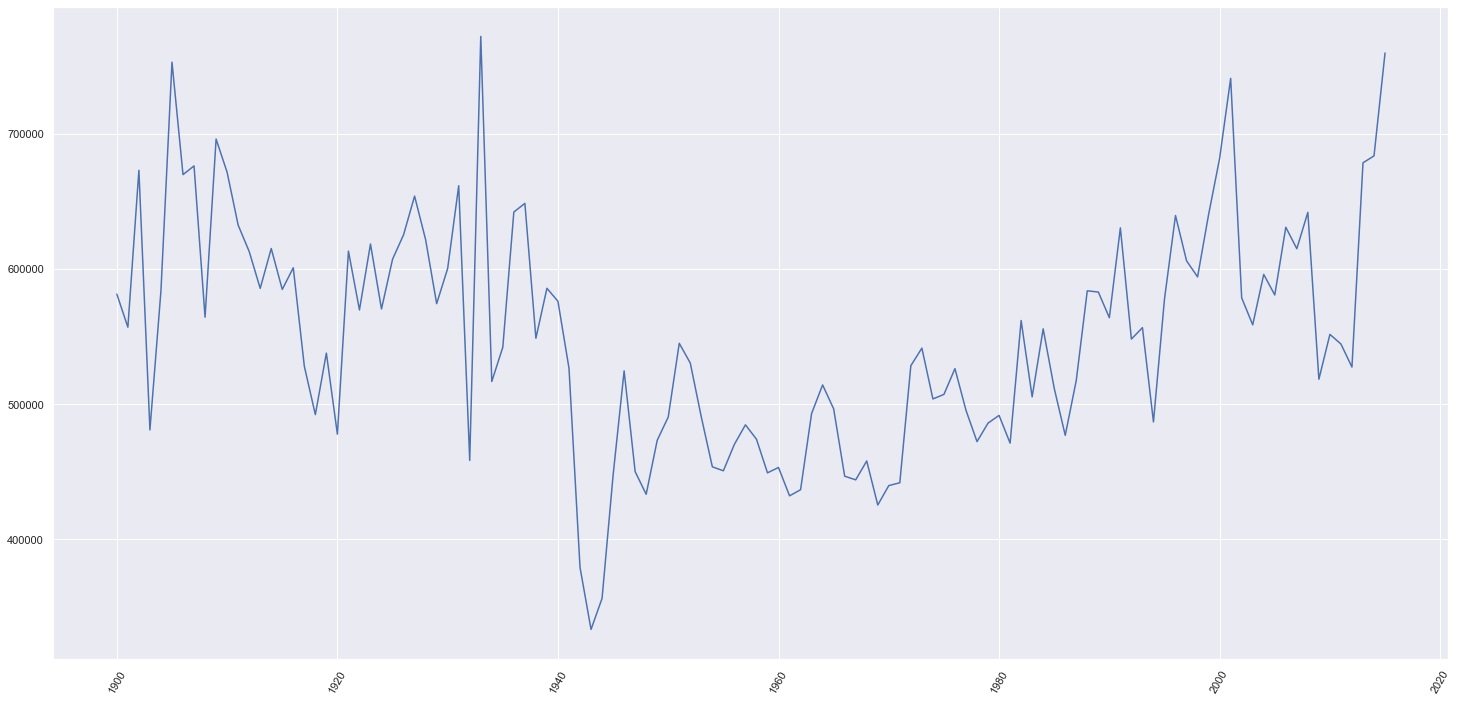

In [128]:
by_yr_built = df3[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
plt.plot(by_yr_built['yr_built'], by_yr_built['price'])
plt.xticks( rotation = 60 )

### 14. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

<BarContainer object of 4 artists>

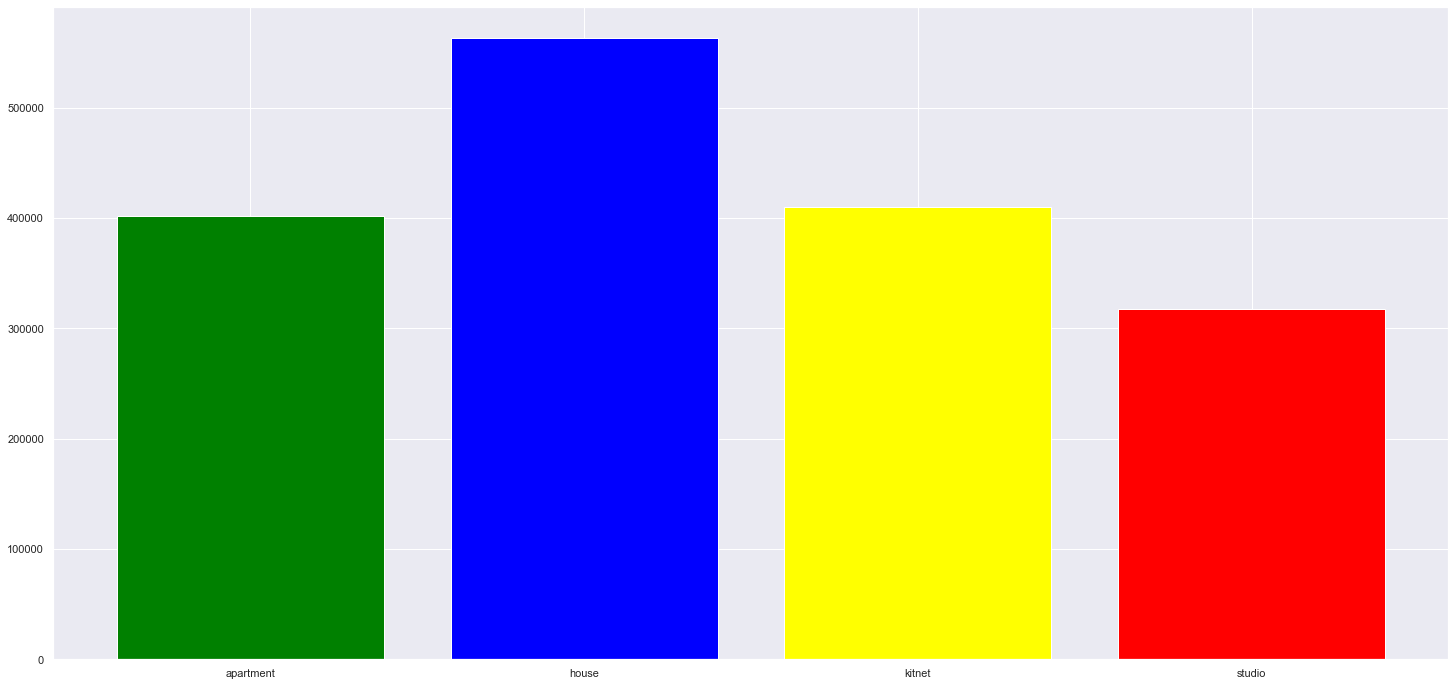

In [129]:
by_dorm = df3[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
color = ['green', 'blue', 'yellow', 'red']

plt.bar(by_dorm['dormitory_type'], by_dorm['price'], color= color)

### 15. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

In [130]:
df3_q15 = df1.loc[df3['yr_renovated'] >= '1930']

(array([1920., 1930., 1940., 1950., 1960., 1970., 1980., 1990., 2000.,
        2010., 2020.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

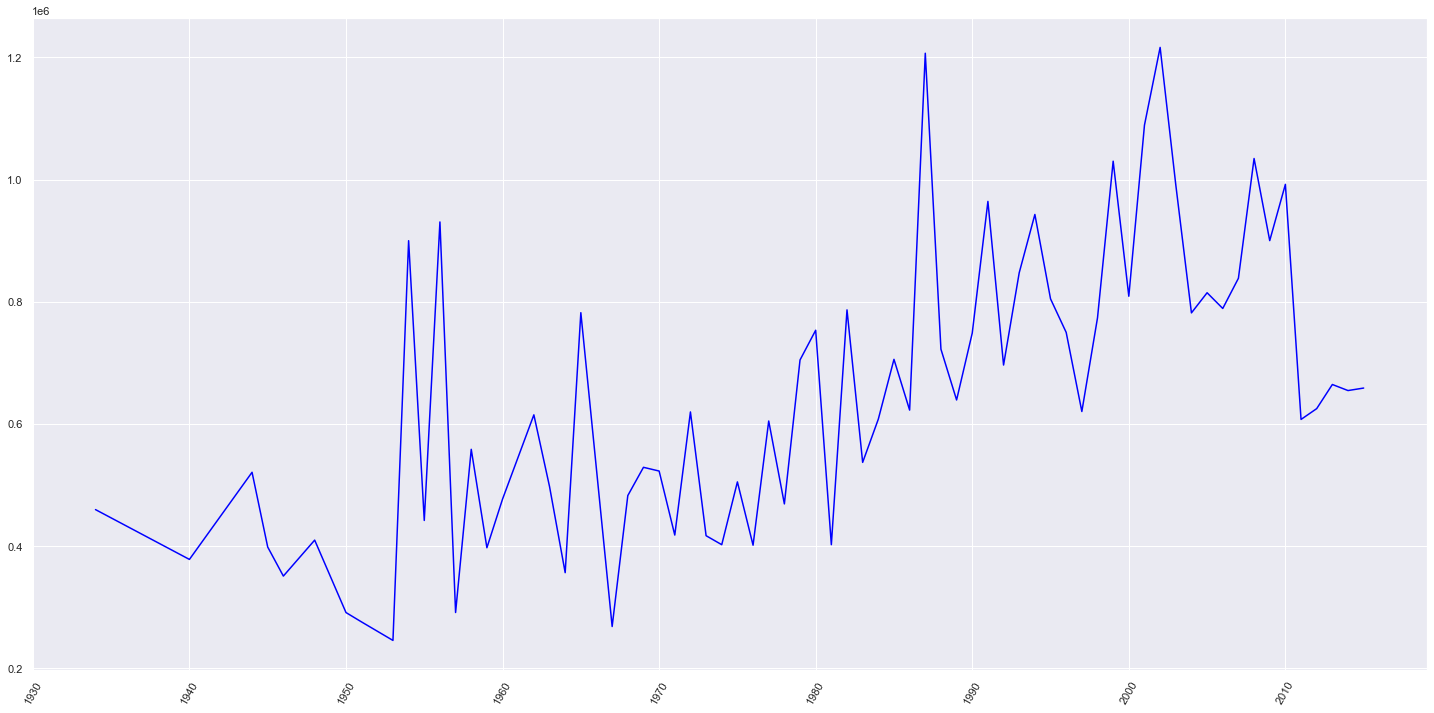

In [131]:
q15 = df3_q15[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
plt.plot(q15['yr_renovated'], q15['price'], color = 'blue')
plt.xticks( rotation= 60 )

### 16. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [132]:
df3[['yr_built','price','dormitory_type']].groupby(['yr_built','dormitory_type']).mean().reset_index()

,yr_built,dormitory_type,price
0,1900-01-01,apartment,589533.33
1,1900-01-01,house,584854.27
2,1900-01-01,studio,398944.00
3,1901-01-01,apartment,452856.40
4,1901-01-01,house,578619.17
...,...,...,...
309,2014-01-01,house,692687.72
310,2014-01-01,studio,516500.00
311,2015-01-01,apartment,543250.00
312,2015-01-01,house,797383.06


### 17. Crie um Dashboard com os gráficos das questões 12, 13, 14 ( Dashboard: 1 Linha e 2 colunas )

<BarContainer object of 4 artists>

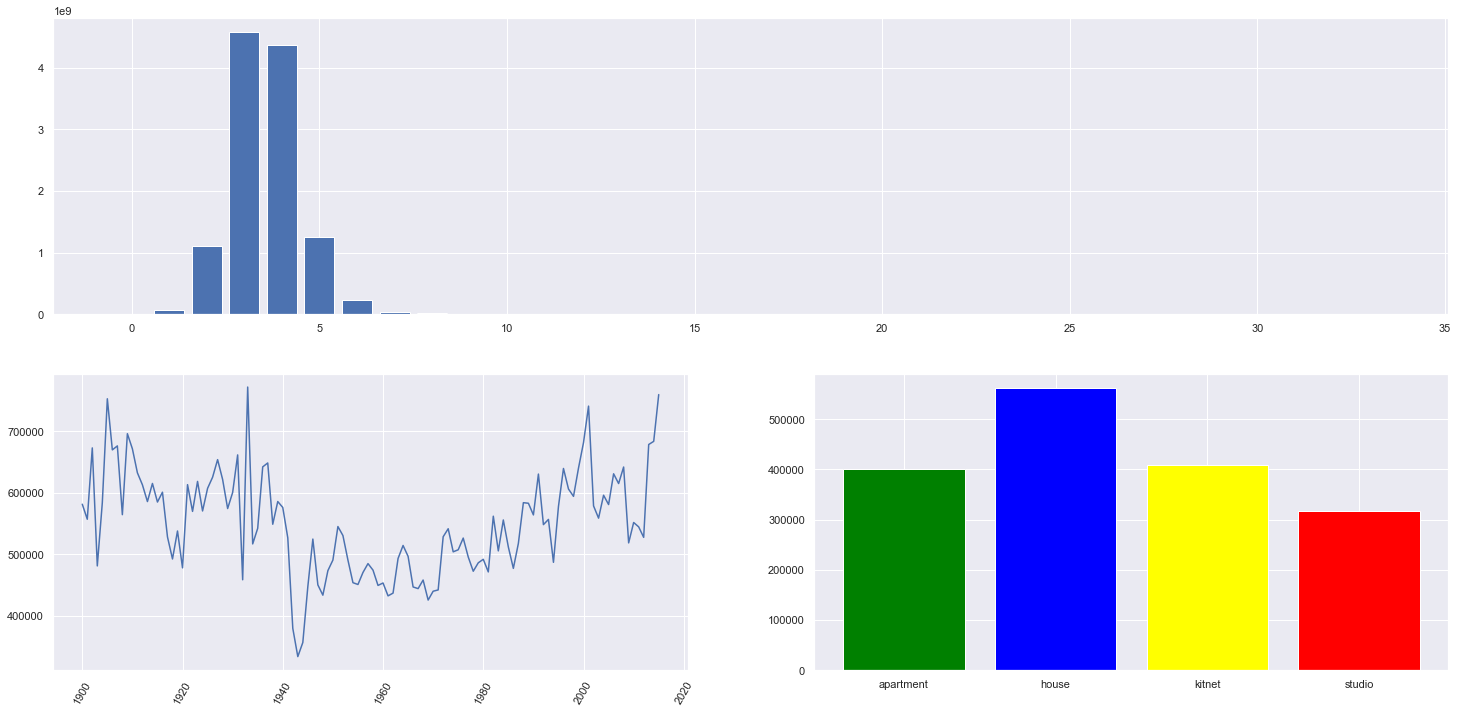

In [133]:
grid = gridspec.GridSpec( 2, 2 )

plt.subplot( grid[0, :])
plt.bar( by_bedrooms['bedrooms'], by_bedrooms['price'])

plt.subplot( grid[1, 0])
plt.plot(by_yr_built['yr_built'], by_yr_built['price'])
plt.xticks( rotation = 60 )

plt.subplot( grid[1,1])
color = ['green', 'blue', 'yellow', 'red']
plt.bar(by_dorm['dormitory_type'], by_dorm['price'], color= color)

### 18. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

<BarContainer object of 4 artists>

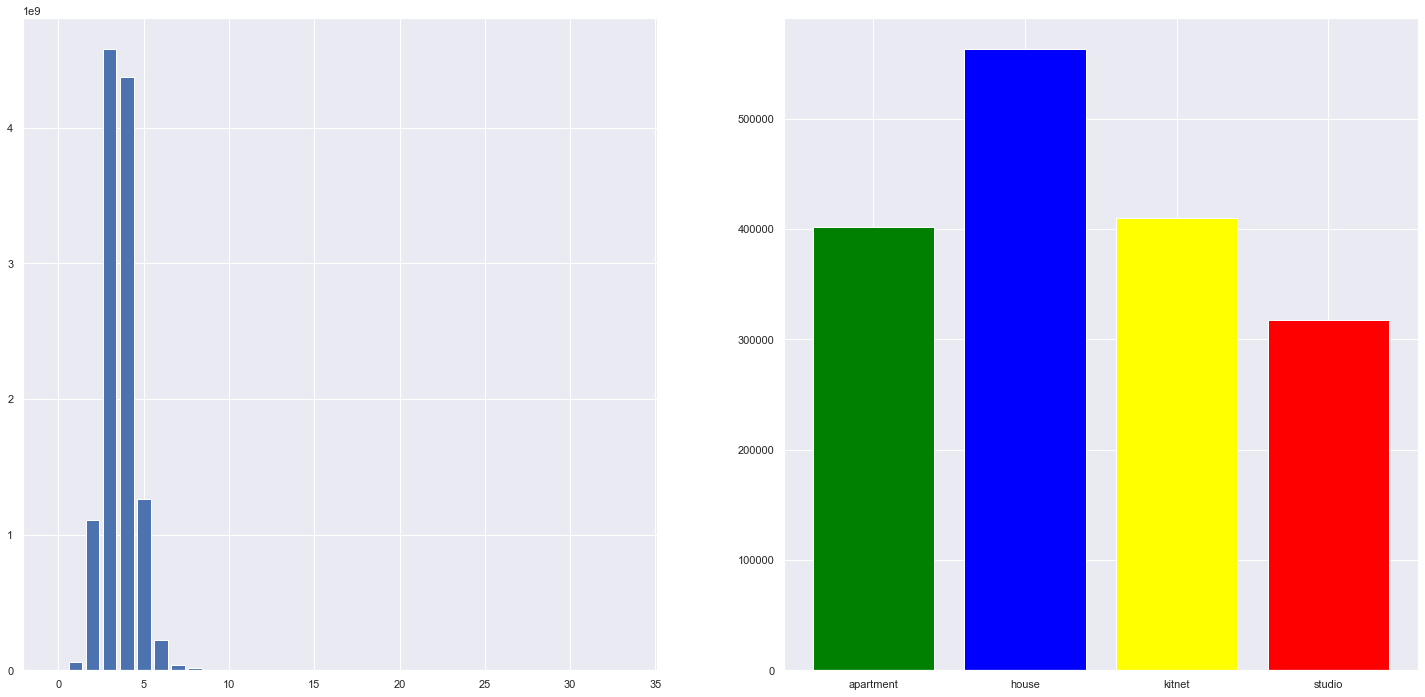

In [134]:
grid = gridspec.GridSpec( 1, 2 )

plt.subplot( grid[0, 0])
plt.bar( by_bedrooms['bedrooms'], by_bedrooms['price'])

plt.subplot( grid[0,1])
color = ['green', 'blue', 'yellow', 'red']
plt.bar(by_dorm['dormitory_type'], by_dorm['price'], color= color)

### 19. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

(array([1920., 1930., 1940., 1950., 1960., 1970., 1980., 1990., 2000.,
        2010., 2020.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

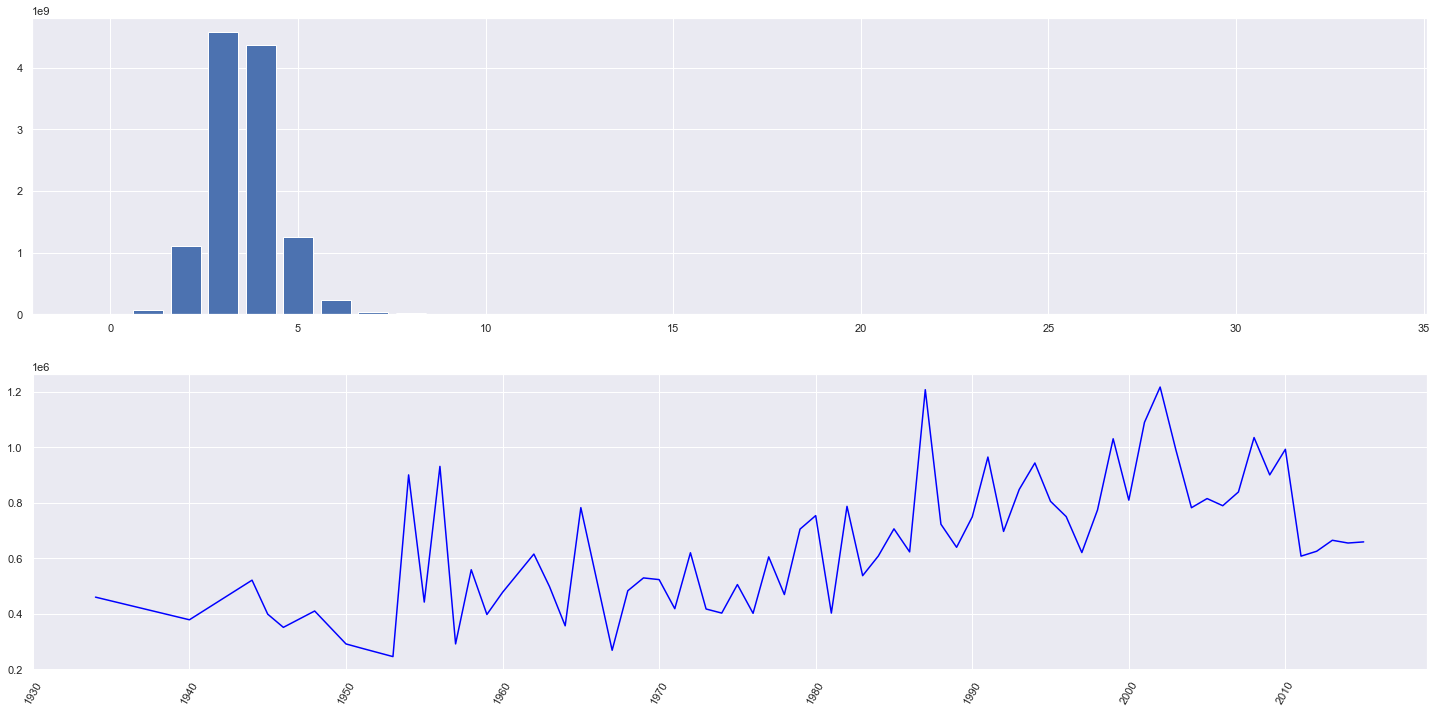

In [135]:
grid = gridspec.GridSpec( 2, 1 )

plt.subplot( grid[0, 0])
plt.bar( by_bedrooms['bedrooms'], by_bedrooms['price'])

plt.subplot( grid[1,0])
plt.plot(q15['yr_renovated'], q15['price'], color = 'blue')
plt.xticks( rotation= 60 )

### 20. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [136]:
by_sqft_living = df3[['sqft_living', 'yr_built']].groupby('yr_built').sum().reset_index()

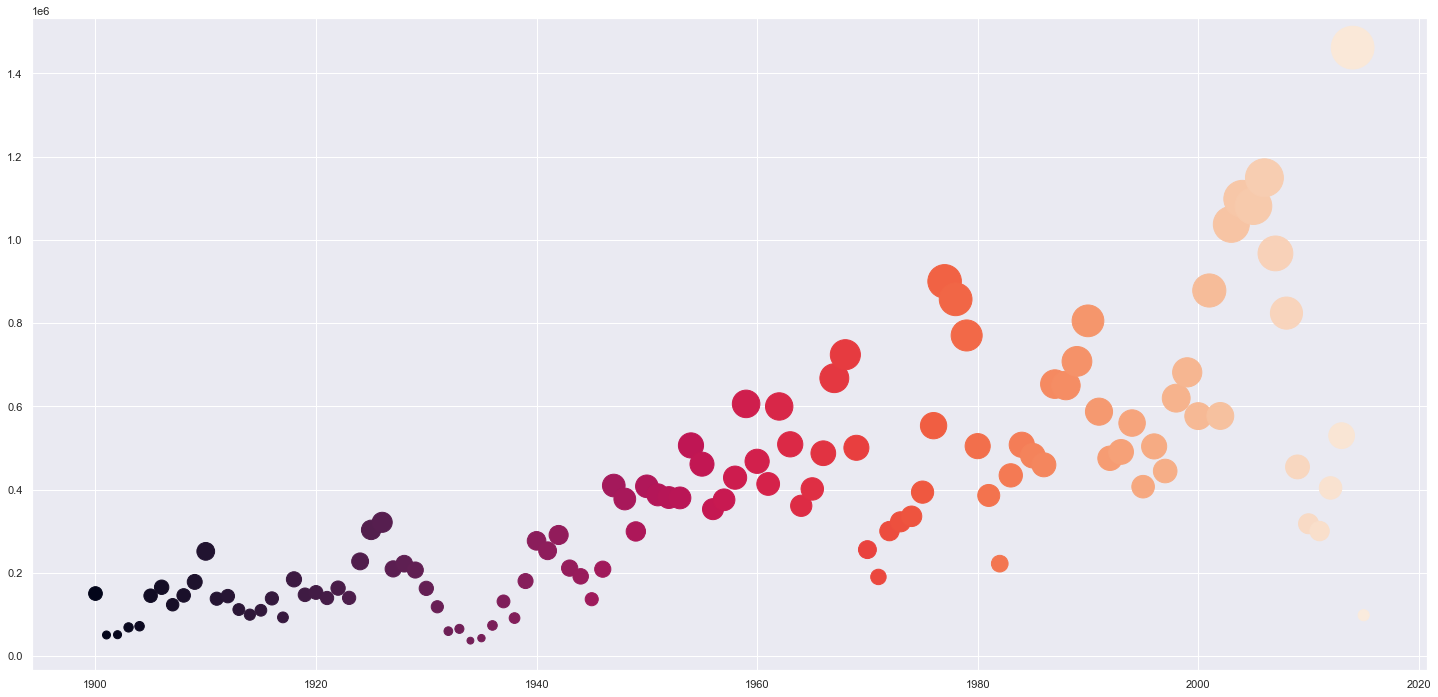

In [137]:
plt.scatter(by_sqft_living['yr_built'], by_sqft_living['sqft_living'], c= by_sqft_living['yr_built'], s= by_sqft_living['sqft_living'] / 800 )

# 4.0. MÓDULO - Perguntas de negócio

## 4.1. Perguntas de negócio

1. Qual a quantidade de imóveis por nível?
- Nível 0 -> Preço entre RS 0 e RS 321.950
- Nível 1 -> Preço entre RS 321.950 e RS 450.000
- Nível 2 -> Preço entre RS 450.000 e RS 645.000
- Nível 3 -> Acima de RS 645.000

2. Adicione as seguintes informações ao
imóvel:
- O nome da Rua
- O número do Imóvel
- O nome do Bairro
- O nome da Cidade
- O nome da Estado
3. Adicionar o Nível dos imóveis no Mapa
como uma Cor
4. Adicionar o Preço dos imóveis como o
tamanho do ponto no mapa
5. Adicionar opções de filtros para eu fazer
minhas próprias análises:
1. Eu quero escolher visualizar
imóveis com vista para água ou não.
2. Eu quero filtrar os imóveis até
um certo valor de preço.
6. Adicionar opções de filtros no último
dashboard enviado:
1. Eu quero visualizar somente
valor a partir de um data disponível para
compra.

1. Qual a média do preço de compra dos 
imóveis por “Nível”? 
- Nível 0 -> Preço entre R$ 0 e R$ 
321.950
- Nível 1 -> Preço entre R$ 321.950 e 
R$ 450.000
- Nível 2 -> Preço entre R$ 450.000 e 
R$ 645.000
- Nível 3 -> Acima de R$ 645.000
2. Qual a média do tamanho da sala de 
estar dos imóveis por “Size” ?
- Size 0 -> Tamanho entre 0 e 1427 
sqft
- Size 1 -> Tamanho entre 1427 e 1910 sqft
- Size 2 -> Tamanho entre 1910 e 
2550 sqft
- Size 3 -> Tamanho acima de 2550 
sqft
3. Adicione as seguinte informações ao 
conjunto de dados original:
- Place ID: Identificação da 
localização
- OSM Type: Open Street Map type
- Country: Nome do País
- Country Code: Código do País
4. Adicione os seguinte filtros no Mapa:
- Tamanho mínimo da área da sala 
de estar.
- Número mínimo de banheiros.
- Valor Máximo do Preço.
- Tamanho máximo da área do 
porão.
- Filtro das Condições do Imóvel.
- Filtro por Ano de Construção.
5. Adicione os seguinte filtros no 
Dashboard:- Filtro por data disponível para 
compra.
- Filtro por ano de renovação.
- Filtro se possui vista para a água 
ou não

## 4.2. Respondendo as perguntas - MÓDULO 04

### 4.2.1. Qual a quantidade de imóveis por nível?
    Nível 0 -> Preço entre RS 0 e RS 321.950
    Nível 1 -> Preço entre RS 321.950 e RS 450.000
    Nível 2 -> Preço entre RS 450.00 e RS 645.000
    Nível 3 -> Acima de RS 645.000

In [138]:
df4 = df3.copy()

In [139]:
df4['nivel'] = np.nan

In [140]:
for i in range( len(df4)):
    if (df4.loc[i, 'price'] < 321950):
        df4.loc[i, 'nivel'] = 0
    elif (df4.loc[i, 'price'] >= 321950) & (df4.loc[i, 'price'] < 450000):
        df4.loc[i, 'nivel'] = 1
    elif (df4.loc[i, 'price'] >= 450000) & (df4.loc[i, 'price'] <= 645000):
        df4.loc[i, 'nivel'] = 2
    elif (df4.loc[i, 'price'] > 645000):
        df4.loc[i, 'nivel'] = 3       
    

In [141]:
df4[['id', 'nivel']].groupby('nivel').count()

,id
nivel,
0.00,5403
1.00,5289
2.00,5548
3.00,5373


### 4.2.2. Adicione as seguintes informações ao imóvel:

    O nome da Rua
    O número do Imóvel
    O nome do Bairro
    O nome da Cidade
    O nome da Estado

In [142]:
# iniciar Nomination API
geolocator = Nominatim( user_agent = 'geoapi')

In [143]:
response = geolocator.reverse( '47.5112,-122.257')

In [144]:
response.raw

{'place_id': 148421265,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 236673600,
 'lat': '47.5112302',
 'lon': '-122.25676111324441',
 'display_name': '10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States',
 'address': {'house_number': '10012',
  'road': '61st Avenue South',
  'neighbourhood': 'Rainier Beach',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98178',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.511189', '47.5112943', '-122.2568571', '-122.2566651']}

In [145]:
# create empty rows

df4['road'] = np.nan
df4['house_number'] = np.nan
df4['neighbourhood'] = np.nan
df4['county'] = np.nan
df4['city'] = np.nan
df4['state'] = np.nan

In [146]:
geolocator = Nominatim( user_agent = 'geoapi')

In [147]:
query = str( df4.loc[0, 'lat'] ) + ',' + str( df4.loc[0, 'long'] )

In [148]:

for i in range (0,25):
    print( 'loop: {} / {}'.format(i, len(df4)))
    query = str( df4.loc[i, 'lat'] ) + ',' + str( df4.loc[i, 'long'] )
    response = geolocator.reverse( query )
    
    if 'house_number' in response.raw['address']:
        df4.loc[i, 'house_number']         = response.raw['address']['house_number']
    if 'road' in response.raw['address']:
        df4.loc[i, 'road']                 = response.raw['address']['road']
    if 'neighbourhood' in response.raw['address']:
        df4.loc[i, 'neighbourhood']        = response.raw['address']['neighbourhood']
    if 'suburb' in response.raw['address']:
        df4.loc[i, 'neighbourhood']        = response.raw['address']['suburb']    
    if 'hamlet' in response.raw['address']:
        df4.loc[i, 'neighbourhood']        = response.raw['address']['hamlet']
    if 'county' in response.raw['address']:
        df4.loc[i, 'county']                 = response.raw['address']['county']
    if 'city' in response.raw['address']:
        df4.loc[i, 'city']                 = response.raw['address']['city']
    if 'town' in response.raw['address']:
        df4.loc[i, 'city']                 = response.raw['address']['town']    
    if  'state' in response.raw['address']:
        df4.loc[i, 'state']                = response.raw['address']['state']
    
    print( query)
    print(response.raw['address'])

loop: 0 / 21613
47.5112,-122.257
{'house_number': '10012', 'road': '61st Avenue South', 'neighbourhood': 'Rainier Beach', 'city': 'Seattle', 'county': 'King County', 'state': 'Washington', 'postcode': '98178', 'country': 'United States', 'country_code': 'us'}
loop: 1 / 21613
47.721,-122.319
{'house_number': '837', 'road': 'Northeast 127th Street', 'suburb': 'Northgate', 'city': 'Seattle', 'county': 'King County', 'state': 'Washington', 'postcode': '98125', 'country': 'United States', 'country_code': 'us'}
loop: 2 / 21613
47.7379,-122.233
{'house_number': '15109', 'road': '81st Avenue Northeast', 'hamlet': 'Moorlands', 'town': 'Kenmore', 'county': 'King County', 'state': 'Washington', 'postcode': '98028', 'country': 'United States', 'country_code': 'us'}
loop: 3 / 21613
47.5208,-122.393
{'house_number': '9236', 'road': 'Fauntleroy Way Southwest', 'hamlet': 'Fauntleroy', 'city': 'Seattle', 'county': 'King County', 'state': 'Washington', 'postcode': '98136', 'country': 'United States', 'c

In [149]:
df4.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
                 ...  
house_number     21589
neighbourhood    21597
county           21588
city             21589
state            21588
Length: 33, dtype: int64

In [150]:
df4.to_csv('Dados/df4.csv', index= False)

### 4.2.3. Adicionar o Nível dos imóveis no Mapa como uma Cor

In [151]:
df_map = df4[['id', 'lat', 'long', 'price'], 'nivel']

# define prices

for i in range( len(df_map))
    if 

SyntaxError: invalid syntax (<ipython-input-151-ab03779d9fa2>, line 5)

In [ ]:
df4['nivel'] = df4['nivel'].astype( int64 )

In [ ]:
fig = px.scatter_mapbox ( df4,
                         lat= 'lat',
                         lon= 'long',
                         color= 'nivel',                         
                         color_continuous_scale= px.colors.diverging.Portland,
                         size_max= 20,
                         zoom= 10 )

fig.update_layout( mapbox_style= 'open-street-map' )
fig.update_layout( height= 600, margin= { 'r':0, 't':0, 'l':0, 'b':0})
fig.show()
                         

### 4.2.4. Adicionar o Preço dos imóveis como o tamanho do ponto no mapa

In [ ]:
fig = px.scatter_mapbox ( df4,
                         lat= 'lat',
                         lon= 'long',
                         color= 'nivel', 
                         size= 'price',
                         color_continuous_scale= px.colors.diverging.Portland,
                         size_max= 20,
                         zoom= 10 )

fig.update_layout( mapbox_style= 'open-street-map' )
fig.update_layout( height= 600, margin= { 'r':0, 't':0, 'l':0, 'b':0})
fig.show()

In [ ]:
fig.write_html('Dados/mapa_nivel_price.html')

### 4.2.5. Adicionar opções de filtros para eu fazer minhas próprias análises.

In [ ]:
# Itarative filter

df4['is_waterfront'] = df4['waterfront'].apply( lambda x: 'yes' if x == 1  else 'no')

df4['filter_level'] = df4['price'].apply( lambda x: 0 if x <= 321950 else
                                                    1 if ( x > 321951 ) & ( x <= 450000 ) else
                                                    2 if ( x > 450000) & ( x < 645000) else 3 )

df4['filter_level'] = df4['filter_level'].astype( int )
filter_style = {' description_width':  'initial'} 

In [ ]:
# Iterative button
price_limit = wd.IntSlider(
    value= 600000,
    min= 75000,
    max= 7700000,
    step= 1000,
    description= 'Max Price',
    disable= False,
    style= filter_style)

In [ ]:
price_limit

### 4.2.6. Eu quero escolher visualizar imóveis com vista para água ou não.

In [ ]:
# Iterative button
waterfront_bar = wd.Dropdown(
    options= ['no', 'yes'],
    value= 'yes',
    description= 'Water View',
    disable= False)   
    

In [ ]:
waterfront_bar

### 4.2.7. Eu quero filtrar os imóveis até um certo valor de preço.

In [ ]:
def update_map( df4, waterfront, limit):
    ite_filter = df4[(df4['price'] <= limit) & 
                 (df4['is_waterfront'] == waterfront)][['id', 'lat', 'long', 'price', 'nivel', 'filter_level']]
    
    fig2 = px.scatter_mapbox ( ite_filter,
                         lat= 'lat',
                         lon= 'long',
                         color= 'nivel', 
                         size= 'price',
                         color_continuous_scale= px.colors.diverging.Portland,
                         size_max= 20,
                         zoom= 10 )

    fig2.update_layout( mapbox_style= 'open-street-map' )
    fig2.update_layout( height= 600, margin= { 'r':0, 't':0, 'l':0, 'b':0})
    fig2.show()
    fig2.write_html('Dados/mapa_nivel_price.html')

In [ ]:
wd.interactive( update_map, df4=fixed(df4), waterfront= waterfront_bar, limit= price_limit )

### 4.2.8. Adicionar opções de filtros no último dashboard enviado:

### 4.2.9. Eu quero visualizar somente valor a partir de um data disponível para compra.